# S16 T01: Pipelines, grid search i text mining

## NIVELL 1

### *Exercici 1*

Agafa el conjunt de dades que vulguis i realitza un pipeline i un gridsearch aplicant l'algorisme de Random Forest



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import DataFrame

from sklearn.compose import ColumnTransformer 
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

+ *Importo el meu data set de tenis*

In [2]:
tenis_df = pd.read_csv('Match.csv')
tenis_df

,match_id,round,date,avg_minutes_game,avg_seconds_point,avg_minutes_set,tournament,year,match_minutes
0,m_2019_A_0,1st Round,2019-01-14,4.81,46.8,43.3,Australian Open,2019,173.0
1,m_2019_A_1,1st Round,2019-01-14,3.95,35.7,40.5,Australian Open,2019,162.0
2,m_2019_A_2,1st Round,2019-01-14,4.86,42.3,43.8,Australian Open,2019,175.0
3,m_2019_A_3,1st Round,2019-01-14,4.43,43.3,41.0,Australian Open,2019,164.0
4,m_2019_A_4,1st Round,2019-01-14,4.37,39.7,43.7,Australian Open,2019,131.0
...,...,...,...,...,...,...,...,...,...
10155,m_2000_W_122,Quarterfinals,2000-06-26,3.95,37.3,41.5,Wimbledon,2000,166.0
10156,m_2000_W_123,Quarterfinals,2000-06-26,4.26,39.0,48.3,Wimbledon,2000,145.0
10157,m_2000_W_124,Semifinals,2000-06-26,3.74,37.2,39.6,Wimbledon,2000,198.0
10158,m_2000_W_125,Semifinals,2000-06-26,3.30,34.7,33.0,Wimbledon,2000,99.0


+ *Una ullada inicial al Data set per orientar-nos de null values i el type de cada feature*

In [3]:
tenis_df.isnull().sum()

match_id              0
round                 0
date                  0
avg_minutes_game     46
avg_seconds_point    45
avg_minutes_set      82
tournament            0
year                  0
match_minutes        43
dtype: int64

+ *Solucionem els null values amb la mean de cada feature on hi hem trobat null values*

In [4]:
avg_minutes_game_mean = tenis_df['avg_minutes_game'].mean()
tenis_df['avg_minutes_game'].fillna(avg_minutes_game_mean, inplace=True)

In [5]:
avg_seconds_point_mean = tenis_df['avg_seconds_point'].mean()
tenis_df['avg_seconds_point'].fillna(avg_seconds_point_mean, inplace=True)

In [6]:
avg_minutes_set_mean = tenis_df['avg_minutes_set'].mean()
tenis_df['avg_minutes_set'].fillna(avg_minutes_set_mean, inplace=True)

In [7]:
match_minutes_mean = tenis_df['match_minutes'].mean()
tenis_df['match_minutes'].fillna(match_minutes_mean, inplace=True)

In [8]:
tenis_df.isnull().sum()

match_id             0
round                0
date                 0
avg_minutes_game     0
avg_seconds_point    0
avg_minutes_set      0
tournament           0
year                 0
match_minutes        0
dtype: int64

In [9]:
# separate the independent and target variable 
X = tenis_df.drop('tournament', 1)
y = tenis_df['tournament']

In [10]:
type(X)

pandas.core.frame.DataFrame

In [11]:
type(y)

pandas.core.series.Series

+ *Faig una definició de variables per grups(nimèriques i categòriques) i dels transformers que vull passar pel
   mètode "ColumnTransformer()"
   
   *Un cop definit lo anterior, puc fer el pipeline amb "Pipeline()" i els steps necessaris que marquen la sequència amb
    que jo vull que passin les coses*

In [12]:
numeric_features = ['avg_minutes_game', 'avg_seconds_point','avg_minutes_set', 'match_minutes']
numeric_transformer =  StandardScaler()


categorical_features = ['round']
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
         transformers=[                    
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])




In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [14]:
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['avg_minutes_game',
                                                   'avg_seconds_point',
                                                   'avg_minutes_set',
                                                   'match_minutes']),
                                                 ('cat', OneHotEncoder(),
                                                  ['round'])])),
                ('classifier', RandomForestClassifier())])

+ *I obtinc els scores per train set i test set*

In [15]:
print("model score: %.3f" % rf_pipeline.score(X_train, y_train))
print("model score: %.3f" % rf_pipeline.score(X_test, y_test))

model score: 0.973
model score: 0.315


+ *Preparo el rang dels paràmetres que vull incloure en el param_grid*

In [16]:
# Number if trees in random forest
n_estimators = [10, 20]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2, 5]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]



In [17]:
param_grid = {'classifier__n_estimators' : n_estimators,
              'classifier__max_features' : max_features,
              'classifier__max_depth' : max_depth,
               'classifier__min_samples_split' : min_samples_split,
              }

In [18]:
print(param_grid)

{'classifier__n_estimators': [10, 20], 'classifier__max_features': ['auto', 'sqrt'], 'classifier__max_depth': [2, 5], 'classifier__min_samples_split': [2, 5]}


+ *faig el GridSearch amb el pipeline, el param_grid definit i cross validation = 5*

In [19]:
clf = GridSearchCV (estimator = rf_pipeline , param_grid = param_grid, cv = 5)

+ *Entreno el train set amb el Gridsearch*

In [20]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['avg_minutes_game',
                                                                          'avg_seconds_point',
                                                                          'avg_minutes_set',
                                                                          'match_minutes']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['round'])])),
                                       ('classifier',
                                        RandomForestClassifier())])

+ *obtinc els "best_param del GridSearch*

In [21]:
clf.fit(X_train, y_train)

print(f"Best params:")
print(clf.best_params_)

Best params:
{'classifier__max_depth': 5, 'classifier__max_features': 'sqrt', 'classifier__min_samples_split': 2, 'classifier__n_estimators': 20}


+ *I el millor score que em proporciona el Gridsearch*

In [22]:
print(f"Internal CV score: {clf.best_score_:.3f}")

Internal CV score: 0.353


+ *Fem predicció sobre y_test*

In [23]:
y_predict = clf.predict(X_test)
y_predict

array(['Wimbledon', 'Wimbledon', 'Wimbledon', ..., 'US Open', 'Wimbledon',
       'Wimbledon'], dtype=object)

In [24]:
print("model score: %.3f" % rf_pipeline.score(X_test, y_test))

model score: 0.315


+ *Obtinc Accuracy i Classification Error*

In [37]:
# Calculem l'Accuracy : sobre el total de y_test, en quin percentatge el model encerta el valors amb y_predict* 
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_predict))

0.3425196850393701


In [38]:
 # Classification Error : sobre el total de y_test, en quin percentatge el model NO encerta el valors amb y_pred_dtc
print('Classification Error : {}'.format(1 - metrics.accuracy_score(y_test, y_predict)))

Classification Error : 0.6574803149606299


+ *i la matriu de confussió que és per una variable target "multiclass" (4 possibles resultats)*

In [27]:
# Genero la matriu de confussió*
cnf = metrics.confusion_matrix(y_test, y_predict)
print(cnf)

[[ 75 261  10 175]
 [ 66 321  10 120]
 [ 68 262  32 147]
 [ 63 118  36 268]]


In [28]:
y.unique()

array(['Australian Open', 'French Open', 'US Open', 'Wimbledon'],
      dtype=object)

+ *La visualitzo*

In [29]:
import seaborn as sns

Text(0.5, 257.44, 'Predicted label')

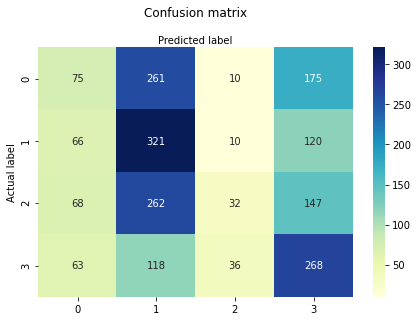

In [33]:
class_names=['Australian Open', 'French Open', 'US Open', 'Wimbledon'] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

+ *Fem un classification report*

In [34]:
print(metrics.classification_report(y_test, y_predict))

                 precision    recall  f1-score   support

Australian Open       0.28      0.14      0.19       521
    French Open       0.33      0.62      0.43       517
        US Open       0.36      0.06      0.11       509
      Wimbledon       0.38      0.55      0.45       485

       accuracy                           0.34      2032
      macro avg       0.34      0.35      0.29      2032
   weighted avg       0.34      0.34      0.29      2032



+ *I podem finalment obtenir AUC*

In [35]:
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score

In [36]:
y_predict_proba = clf.predict_proba(X_test)
auc = metrics.roc_auc_score(y_test, y_predict_proba, multi_class = 'ovo')
print('AUC = {}'.format(auc))       # Cal incloure "multi_class = 'ovo'" al no ser binaria la avriable objectiu

AUC = 0.6127145552929921
